<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/DL/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://compmath.korea.ac.kr/appmath2021/Perceptron.html

밑바닥부터 시작하는 딥러닝

딥 러닝을 이용한 자연어 처리 입문 https://wikidocs.net/24958

# 3.1 신경망

## 3.1.1 신경망이란

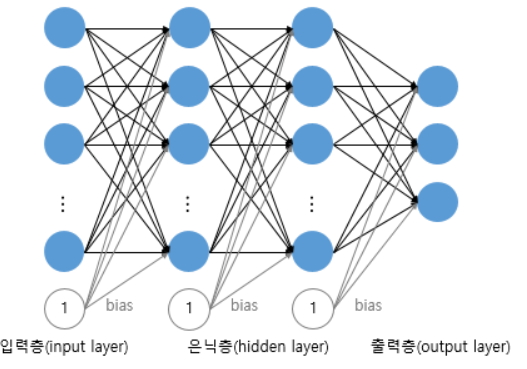

입력층(input layer): 처음 raw 데이터가 들어가는 층  
출력층(ouput layer): 결과가 출력되는 층  
은닉층(hidden layer): 입력층과 출력층과 달리 눈에 안보이며, 입력층에서 데이터를 받아 출력층까지 전달하는 층


## 3.2 활성화함수

$$
a = (b + w_1x_1 + w_2x_2)
$$
$$
y = h(a)
$$

**활성화 함수(activation function) $h(x)$**는 입력 신호의 총합을 출력 신호로 변환하는 함수이다.  
위 식에서 나타내듯 활성화 함수는 먼저 가중치가 곱해진 입력 신호의 총합($a$)를 계산하고, 활성화 함수 $h(x)$에 입력해 y를 출력하게 된다.

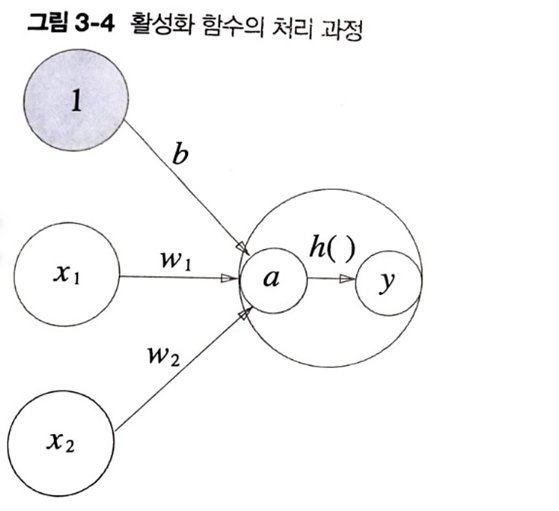

## 3.3 활성화 함수의 종류

### 3.3.1 계단 함수 step function

퍼셉트론에서 사용한 임계값을 경계로 출력이 바뀌는 함수를 **계단 함수(step function)**이라고 한다.
- 입력이 작으면 출력은 0이 되고 임계값보다 입력 값이 높아지면 출력이 1이 된다.

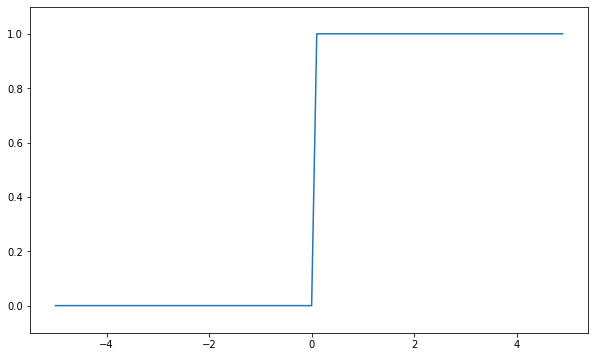

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# 계단 함수의 코드 구현
def step_function(x):
    return np.array(x > 0, dtype=int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축의 범위 지정
plt.show()

### 3.3.2 시그모이드 함수 sigmoid function

$$
h(x) = \frac{1}{1 + exp(-x)} 
$$


시그모이드 함수는 얼핏보면 복잡해보이지만 이 함수도 계단 함수와 같이 입력값이 주어지면 출력을 돌려주는 단순한 함수일 뿐이다.  예를 들어 h(1.0) = 0.731.. 과 같은 특정 정해진 값을 출력하게 된다.
- 입력이 작으면 0에 가깝고, 입력이 커지면 1에 가까워진다. 아무리 작거나 커도 출력은 0과 1사이값이다.
- 시그모이드 함수의 미분 최대값 0.25

In [14]:
# 시그모이드 함수의 코드 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

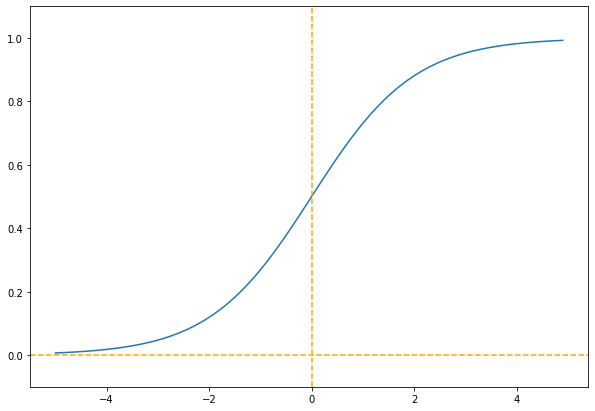

In [25]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.axhline(y=0, color='orange', linestyle='--')
plt.axvline(x=0, color='orange', linestyle='--')
plt.ylim(-0.1,1.1) # y축의 범위 지정
plt.show()

### 3.3.3 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환합니다. 하이퍼볼릭탄젠트 함수를 미분했을 때의 최대값은 1로 시그모이드 함수의 최대값인 0.25보다는 큽니다. 다시 말해 미분했을 때 시그모이드 함수보다는 전반적으로 큰 값이 나오게 됩니다. 

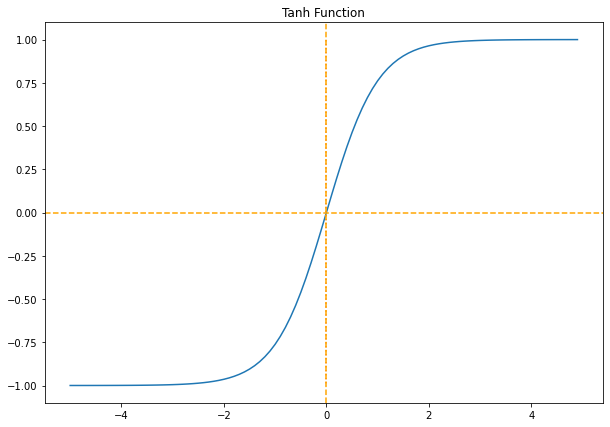

In [26]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.axvline(x=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

### 3.3.4 ReLu 함수

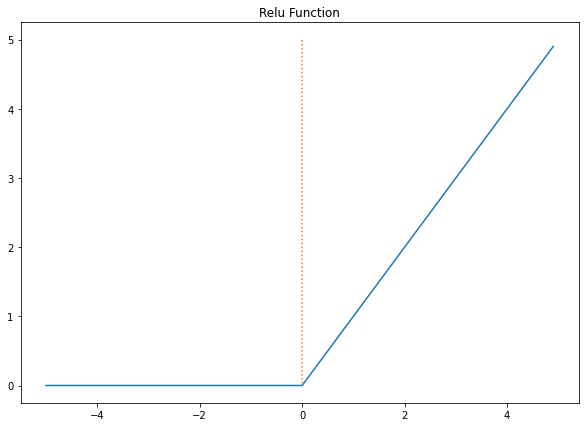

In [28]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

### 3.3.5 Softmax함수